In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
import seaborn as sns
sns.set_theme()
pd.options.display.float_format = '{:.6f}'.format
from collections import defaultdict

In [ ]:
# input metadata
path = "/storage/public/home/2020060185/jupyter/GTEx/00.metadata"
meta = pd.read_csv(f"{path}/sheep_RNA-Seq_20240610.txt",sep="\t")
meta = meta[meta['Filter']=="pass"]
rna2tis1 = meta.set_index('Sample')['QTL1'].to_dict()
rna2tis2 = meta.set_index('Sample')['QTL2'].to_dict()
rna2tis3 = meta.set_index('Sample')['QTL3'].to_dict()
tisgroups=[set(rna2tis1.values()), set(rna2tis2.values()), set(rna2tis3.values())]
tisgroups[1].remove(np.nan) ; tisgroups[2].remove(np.nan)
rna2reads = meta.set_index('Sample')['Clean reads (million)'].to_dict()
tisorder = pd.read_csv(f"{path}/tissue.order",sep="\t")
palette = tisorder.set_index('Tissue (QTL)')['Color'].to_dict()

# assign samples into individuals

## assignment

In [ ]:
# input order
path = "/storage/public/home/2020060185/00.sheep_goatGTEx/01.sheepGTEx/02.MP2/02.stat/02.imputation/01.genotype/discovery/main"
order = pd.read_csv(f"{path}/true.sort.list", names=['rna', 'wgs', 'tissue', 'breed'], sep="\t")
rna2wgs = order.set_index('rna')['wgs'].to_dict()

In [ ]:
# input ibs data
header = [id.strip().split()[0] for id in open(f"{path}/chrAuto.filtered.mibs.id", 'r')]
dfi = pd.read_csv(f"{path}/chrAuto.filtered.mibs", names=header, sep="\t")
dfi = dfi.set_index(dfi.columns.copy())
dfim = dfi.rename_axis(None).reset_index().melt(id_vars='index', var_name='rna2', value_name='rna_ibs').rename(columns={"index": "rna1"})
dfim['wgs1'] = dfim['rna1'].map(rna2wgs)
dfim['wgs2'] = dfim['rna2'].map(rna2wgs)
dfim['Type'] = 'Others'
dfim.loc[(dfim['rna1'] == dfim['rna2'])|(dfim['wgs1'] == dfim['wgs2']), 'Type'] = 'The same'
dfim.loc[(dfim['wgs1'].notnull())&(dfim['wgs2'].notnull())&(dfim['wgs1'] != dfim['wgs2']), 'Type'] = 'Different'
dfim

,rna1,rna2,rna_ibs,wgs1,wgs2,Type
0,SAMN14851425,SAMN14851425,1.000000,NaN,NaN,The same
1,SAMEA5574418,SAMN14851425,0.724199,NaN,NaN,Others
2,SAMN32106239,SAMN14851425,0.737365,NaN,NaN,Others
3,WBZF146,SAMN14851425,0.740548,23121827D,NaN,Others
4,SAMN13545277,SAMN14851425,0.728761,NaN,NaN,Others
...,...,...,...,...,...,...
66765236,XWH-469xiongxian,RX9063,0.742936,NaN,NaN,Others
66765237,SAMEA4938418,RX9063,0.712109,NaN,NaN,Others
66765238,SAMN03247590,RX9063,0.731161,NaN,NaN,Others
66765239,SAMN15282766,RX9063,0.721214,NaN,NaN,Others


In [ ]:
# input grm data
with open (f"{path}/chrAuto.filtered.grm.id", 'r') as f:
    id2rna = {}
    i=1
    for line in f:
        tline = line.strip().split()
        id2rna[i] = tline[0]
        i += 1

dfg = pd.read_csv(f"{path}/chrAuto.filtered.grm.gz", sep="\t", compression='gzip',
                  names=['rna1', 'rna2', 'number of SNPs', 'rna_grm'])
dfg['rna1'] = dfg['rna1'].map(id2rna)
dfg['rna2'] = dfg['rna2'].map(id2rna)
dfg

,rna1,rna2,number of SNPs,rna_grm
0,SAMN14851425,SAMN14851425,3427511.000000,1.078374
1,SAMEA5574418,SAMN14851425,3427511.000000,-0.021834
2,SAMEA5574418,SAMEA5574418,3427511.000000,1.122148
3,SAMN32106239,SAMN14851425,3427511.000000,0.006568
4,SAMN32106239,SAMEA5574418,3427511.000000,-0.088923
...,...,...,...,...
33386701,RX9063,XWH-469xiongxian,3427511.000000,0.068922
33386702,RX9063,SAMEA4938418,3427511.000000,-0.091673
33386703,RX9063,SAMN03247590,3427511.000000,-0.046286
33386704,RX9063,SAMN15282766,3427511.000000,-0.054717


In [ ]:
dfm = dfim.merge(dfg, on=['rna1', 'rna2'])
dfm

,rna1,rna2,rna_ibs,wgs1,wgs2,Type,number of SNPs,rna_grm
0,SAMN14851425,SAMN14851425,1.000000,NaN,NaN,The same,3427511.000000,1.078374
1,SAMEA5574418,SAMN14851425,0.724199,NaN,NaN,Others,3427511.000000,-0.021834
2,SAMN32106239,SAMN14851425,0.737365,NaN,NaN,Others,3427511.000000,0.006568
3,WBZF146,SAMN14851425,0.740548,23121827D,NaN,Others,3427511.000000,-0.002069
4,SAMN13545277,SAMN14851425,0.728761,NaN,NaN,Others,3427511.000000,0.003250
...,...,...,...,...,...,...,...,...
33386701,SAMN15282766,SAMN03247590,0.739588,NaN,NaN,Others,3427511.000000,0.022818
33386702,RX9063,SAMN03247590,0.731161,NaN,NaN,Others,3427511.000000,-0.046286
33386703,SAMN15282766,SAMN15282766,1.000000,NaN,NaN,The same,3427511.000000,1.121473
33386704,RX9063,SAMN15282766,0.721214,NaN,NaN,Others,3427511.000000,-0.054717


In [ ]:
# classify samples
dfm.loc[(dfm['rna_ibs']>=0.9)&(dfm['rna_grm']>=0.5)&(dfm['Type']=="Others"), 'Type'] = "The same"
dfms = dfm[dfm['Type']=="The same"].sort_values(by=['rna1','rna2']).reset_index(drop=True)

# assign samples into individuals
indgroup = []
for index, row in dfms.iterrows():
    if index == 0:
        indgroup.append({row['rna1'], row['rna2']})
        continue
    notin = True
    for indset in indgroup:
        if (row['rna1'] in indset) or (row['rna2'] in indset):
            indset.update([row['rna1'],row['rna2']])
            notin = False
            break
    if notin:
        indgroup.append({row['rna1'], row['rna2']})
    if index % 10000 == 0:
        print(index)

# remove duplicated samples
samplelist = []
for indset in indgroup:
    for sample in indset:
        samplelist.append(sample)
dupsample = list(set([x for x in samplelist if samplelist.count(x) > 1]))

dup_indgroup = []
uniq_indgroup = []
for indset in indgroup:
    if len(set(dupsample) & indset) > 0:
        dup_indgroup.append(indset)
    else:
        uniq_indgroup.append(indset)
        
uniq_dup_indgroup = set()
for indset1 in dup_indgroup:
    for indset2 in dup_indgroup:
        if len(indset1 & indset2) > 0:
            indset1.update(indset2)
    uniq_dup_indgroup.add(frozenset(indset1))
uniq_indgroup.extend(list(uniq_dup_indgroup))

10000
20000
30000
40000
50000


In [ ]:
# assign samples into individuals
ind2sample = {}
for sampleset in uniq_indgroup:
    samplelist = np.array(sorted(list(sampleset)))
    readlist = np.array(list(map(rna2reads.get, samplelist)))
    # select the sample with most clean reads as individual ID
    ind2sample[samplelist[np.argmax(readlist)]] = samplelist

In [ ]:
# check outliners
sample1='SAMN36788230'
sample2='SAMN36788099'
condition1 = (dfm['rna1']==sample1)&(dfm['rna2']==sample2)
condition2 = (dfm['rna1']==sample2)&(dfm['rna2']==sample1)
dfm[condition1|condition2]

,rna1,rna2,rna_ibs,wgs1,wgs2,Type,number of SNPs,rna_grm
18849061,SAMN36788099,SAMN36788230,0.955563,NaN,NaN,The same,3427511.000000,0.975320


In [ ]:
# assign individuals into tissues
tis2ind2count = defaultdict(dict)
tis2ind2sample = defaultdict(dict)
tis2ind2smlist = defaultdict(dict)

for i, tisgroup in enumerate(tisgroups):
    for tis in tisgroup:
        for ind in ind2sample:
            samplelist = np.array(ind2sample[ind])
            readlist = np.array(list(map(rna2reads.get, samplelist)))
            if i == 0:
                tislist = np.array(list(map(rna2tis1.get, samplelist)))
            elif i == 1:
                tislist = np.array(list(map(rna2tis2.get, samplelist)))
            elif i == 2:
                tislist = np.array(list(map(rna2tis3.get, samplelist)))
                
            if len(samplelist[tislist == tis]) > 0:
                # select the sample with most clean reads
                sample = samplelist[tislist == tis][np.argmax(readlist[tislist == tis])]
                tis2ind2count[tis][ind] = len(samplelist[tislist == tis])
                tis2ind2sample[tis][ind] = sample
                tis2ind2smlist[tis][ind] = samplelist[tislist == tis].tolist()

<ipython-input-10-6e63c5d1cbe3>:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len(samplelist[tislist == tis]) > 0:


In [ ]:
k = 0
for tis in tisgroups[0]:
    for ind in tis2ind2count[tis]:
        k += tis2ind2count[tis][ind]
k

8171

In [ ]:
with open(f'{path}/sample_ind.tsv', 'w') as f:
    for tis in tisgroups[0]:
        for ind in tis2ind2smlist[tis]:
            for smid in tis2ind2smlist[tis][ind]:
                f.write(f'{smid}\t{ind}\n')

In [ ]:
# save the results
dftc = pd.DataFrame.from_dict(tis2ind2count).reindex(columns=tisorder['Tissue (QTL)'])
dftc.to_csv(f'{path}/tis_ind_count.tsv', sep='\t')
dfts = pd.DataFrame.from_dict(tis2ind2sample).reindex(columns=tisorder['Tissue (QTL)'])
dfts.to_csv(f'{path}/tis_ind_sample.tsv', sep='\t')

## plot

In [ ]:
dftc = pd.read_csv(f'{path}/tis_ind_count.tsv', sep='\t', index_col=0)
dftc = dftc.loc[dftc.count(axis=1)>0, dftc.count()>0]
dfts = pd.read_csv(f'{path}/tis_ind_sample.tsv', sep='\t', index_col=0)
dfts = dfts.loc[dfts.count(axis=1)>0, dfts.count()>0]
dfts

,Heart,Artery,Rumen,Reticulum,Omasum,Abomasum,Small_intestine,Duodenum,Jejunum,Ileum,...,Kidney,Salivary_gland,Esophagus,Pancreatic_islet,Amnion,Lymph,Tonsil,Alveolar_macrophage,Bone,Periosteum
SAMN00103467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN00103467,NaN
SAMN00103503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN00103503,NaN
SAMN00103504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN00103504,NaN
SAMN00103505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN00103505,NaN
SAMN00103506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMN00103506,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMN28032957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMN28032959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMN28032960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMN28032961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("total sample: ", dfts.count().sum())
print("non-redundant sample: ", dfts.nunique(axis=1).sum())
print(dfts.count(axis=0).sort_values())
print(dfts.shape)
# melt
dftsm = pd.melt(dfts.reset_index(), id_vars=['index'], var_name="Tissue", value_name="Sample").rename(columns={'index':'Individual'})
dftsm.to_csv(f'{path}/ind_tis_sample_melt.tsv', sep='\t', index=False)

total sample:  9365
non-redundant sample:  7118
Lymph                    3
Alveolar_macrophage      5
Hair_follicle            8
Bone                     8
Skeletal_muscle          8
                      ... 
Longissimus_muscle     419
Brain                  481
Adipose                491
Liver                  567
Muscle                 713
Length: 75, dtype: int64
(2904, 75)


/tmp/ipykernel_254451/1795348916.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


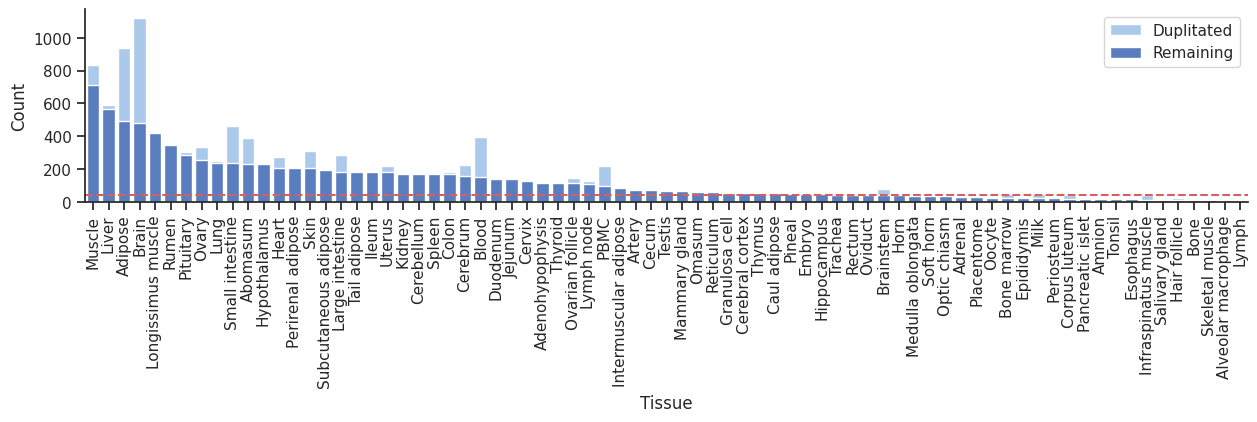

In [ ]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(15, 2.5))

dftct = dftc.sum().reset_index().rename(columns={'index': 'Tissue', 0: 'Duplicate'})
dftcr = dftc.count().reset_index().rename(columns={'index': 'Tissue', 0: 'Remaining'})

dfplot = pd.merge(dftct, dftcr, on="Tissue").sort_values(by='Remaining', ascending=False)
dfplot['Tissue'] = dfplot['Tissue'].str.replace('_', ' ', regex=False)
dfplot.to_csv(f'{path}/tissue_dupcount.tsv', sep="\t")

sns.set_color_codes("pastel")
sns.barplot(x='Tissue', y='Duplicate', data=dfplot,
            label="Duplicate", color="b")

sns.set_color_codes("muted")
sns.barplot(x='Tissue', y='Remaining', data=dfplot,
            label="Remaining", color="b")

plt.axhline(40, color='r', linestyle='--')
#plt.axhline(25, color='r', linestyle='--')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.legend(loc="upper right", frameon=True)
plt.ylabel('Count')
sns.despine()
plt.savefig('tissue_dupcount.pdf', bbox_inches='tight')

## filter for different analyses

### for normal molQTL

In [19]:
# Delete participants with under-represented measured tissue
dfts40 = dfts.loc[dfts.count(axis=1)>0, dfts.count()>=40]
dfts40 = dfts40.loc[dfts40.count(axis=1)>0, dfts40.count()>=40]
dfts40 = dfts40.loc[dfts40.count(axis=1)>0, dfts40.count()>=40]
dfts40 = dfts40.loc[dfts40.count(axis=1)>0, dfts40.count()>=40]
dfts40 = dfts40.loc[dfts40.count(axis=1)>0, dfts40.count()>=40]
dfts40 = dfts40.loc[dfts40.count(axis=1)>0, dfts40.count()>=40]
dfts40.to_csv(f'{path}/tis_ind_sample40.tsv', sep='\t')
print("total sample: ", dfts40.count().sum())
print("non-redundant sample: ", dfts40.nunique(axis=1).sum())
print(dfts40.count(axis=0).sort_values())
print(dfts40.shape)
# melt
dftsm = pd.melt(dfts40.reset_index(), id_vars=['index'], var_name="Tissue", value_name="Sample").rename(columns={'index':'Individual'})
dftsm.to_csv(f'{path}/ind_tis_sample_melt40.tsv', sep='\t', index=False)

total sample:  8876
non-redundant sample:  6761
Oviduct                   40
Rectum                    40
Trachea                   43
Hippocampus               47
Embryo                    48
Pineal                    49
Caul_adipose              50
Thymus                    51
Cerebral_cortex           52
Granulosa_cell            55
Reticulum                 57
Omasum                    61
Mammary_gland             63
Testis                    65
Cecum                     68
Artery                    68
Intermuscular_adipose     85
PBMC                      98
Lymph_node               107
Ovarian_follicle         111
Thyroid                  112
Adenohypophysis          116
Cervix                   128
Jejunum                  137
Duodenum                 141
Blood                    150
Cerebrum                 154
Colon                    166
Spleen                   167
Cerebellum               169
Kidney                   171
Ileum                    178
Uterus                  

### for imputed eQTL

In [ ]:
# Delete participants with under-represented measured tissue
dfts25 = dfts.loc[dfts.count(axis=1)>=2, dfts.count()>=25]
dfts25 = dfts25.loc[dfts25.count(axis=1)>=2, dfts25.count()>=25]
dfts25 = dfts25.loc[dfts25.count(axis=1)>=2, dfts25.count()>=25]
dfts25 = dfts25.loc[dfts25.count(axis=1)>=2, dfts25.count()>=25]
dfts25 = dfts25.loc[dfts25.count(axis=1)>=2, dfts25.count()>=25]
dfts25 = dfts25.loc[dfts25.count(axis=1)>=2, dfts25.count()>=25]
dfts25.to_csv(f'{path}/tis2_ind_sample25.tsv', sep='\t')
print("total sample: ", dfts25.count().sum())
print("non-redundant sample: ", dfts25.nunique(axis=1).sum())
print(dfts25.count(axis=0).sort_values())
print(dfts25.shape)
# melt
dftsm = pd.melt(dfts25.reset_index(), id_vars=['index'], var_name="Tissue", value_name="Sample").rename(columns={'index':'Individual'})
dftsm.to_csv(f'{path}/ind_tis2_sample_melt25.tsv', sep='\t', index=False)

total sample:  7915
non-redundant sample:  5715
Bone_marrow               25
Oocyte                    25
Mammary_gland             27
Adrenal                   27
Oviduct                   27
Trachea                   33
Optic_chiasm              35
Soft_horn                 36
Medulla_oblongata         36
Horn                      37
Brainstem                 39
Rectum                    40
Hippocampus               47
Pineal                    49
Caul_adipose              50
Thymus                    50
Cerebral_cortex           52
Granulosa_cell            55
Reticulum                 57
Omasum                    61
Skin                      63
Artery                    68
Cecum                     68
Lymph_node                70
Intermuscular_adipose     85
PBMC                      98
Thyroid                  107
Ovarian_follicle         111
Adenohypophysis          116
Abomasum                 116
Blood                    117
Cervix                   128
Jejunum                 